In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.linear_model import ElasticNet


# Load the dataset


In [104]:
data = pd.read_csv("C:\Jamboree_Admission.csv")
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [132]:
data['Total Score'] = data['GRE Score'] + data['TOEFL Score']
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Total Score
0,337,118,4,4.5,4.5,9.65,1,0.92,455
1,324,107,4,4.0,4.5,8.87,1,0.76,431
2,316,104,3,3.0,3.5,8.00,1,0.72,420
3,322,110,3,3.5,2.5,8.67,1,0.80,432
4,314,103,2,2.0,3.0,8.21,0,0.65,417
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,440
496,337,117,5,5.0,5.0,9.87,1,0.96,454
497,330,120,5,4.5,5.0,9.56,1,0.93,450
498,312,103,4,4.0,5.0,8.43,0,0.73,415


# Identify outliers using IQR method



In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1


# Define upper and lower bounds for outliers

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers

In [ ]:
data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound).all(axis=1)]

# Drop Serial No. as it is just an identifier


In [105]:
data = data.drop(columns=['Serial No.'])
data.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


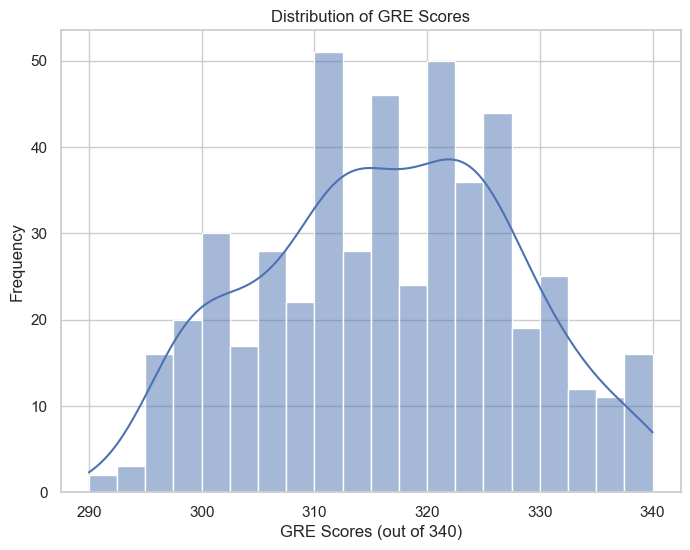

In [112]:
plt.figure(figsize=(8, 6))
sns.histplot(data['GRE Score'], bins=20, kde=True)
plt.title('Distribution of GRE Scores')
plt.xlabel('GRE Scores (out of 340)')
plt.ylabel('Frequency')
plt.show()

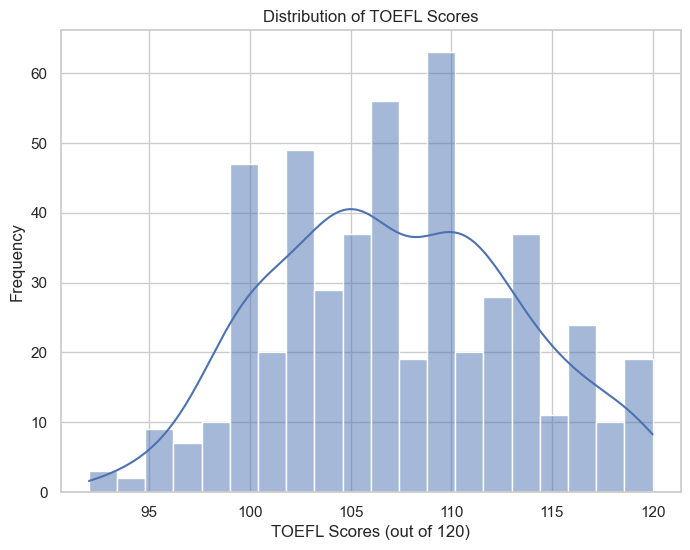

In [114]:
plt.figure(figsize=(8, 6))
sns.histplot(data['TOEFL Score'], bins=20, kde=True)
plt.title('Distribution of TOEFL Scores')
plt.xlabel('TOEFL Scores (out of 120)')
plt.ylabel('Frequency')
plt.show()

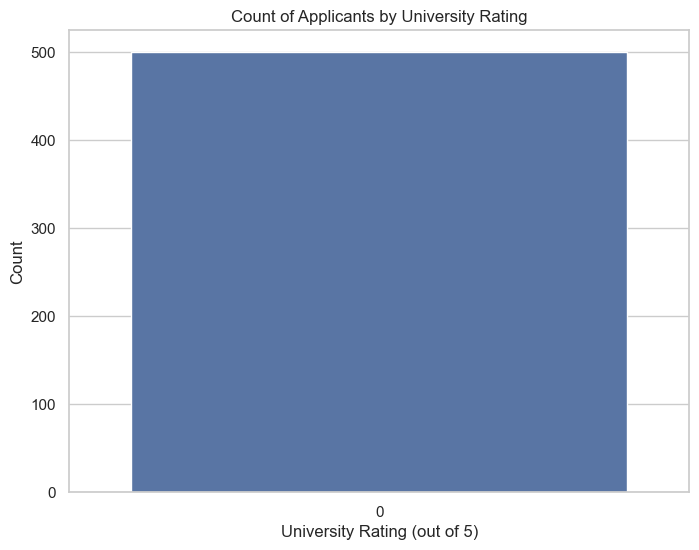

In [115]:
plt.figure(figsize=(8, 6))
sns.countplot(data['University Rating'])
plt.title('Count of Applicants by University Rating')
plt.xlabel('University Rating (out of 5)')
plt.ylabel('Count')
plt.show()

# NON GRAPHICAL ANALYSIS


SUMMARY

In [59]:
summary_stats = data.describe()
summary_stats


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,316.583501,107.259557,3.122736,3.379276,3.492958,8.582334,0.563380,0.723883
std,11.237070,6.036101,1.140806,0.987070,0.918806,0.601367,0.496466,0.138800
min,290.000000,92.000000,1.000000,1.000000,1.500000,6.800000,0.000000,0.360000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.130000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Correlation Matrix:

In [60]:
correlation_matrix = data.corr()
print(correlation_matrix)

                   GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.824360           0.631514  0.614286   
TOEFL Score         0.824360     1.000000           0.645349  0.643806   
University Rating   0.631514     0.645349           1.000000  0.727569   
SOP                 0.614286     0.643806           0.727569  1.000000   
LOR                 0.518457     0.533263           0.603831  0.659858   
CGPA                0.823739     0.807282           0.701979  0.711175   
Research            0.558932     0.461071           0.422304  0.406490   
Chance of Admit     0.807594     0.788128           0.688621  0.690654   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.518457  0.823739  0.558932          0.807594  
TOEFL Score        0.533263  0.807282  0.461071          0.788128  
University Rating  0.603831  0.701979  0.422304          0.688621  
SOP                0.659858  0.711175  0.406490          0.69

# Graphical Analysis:


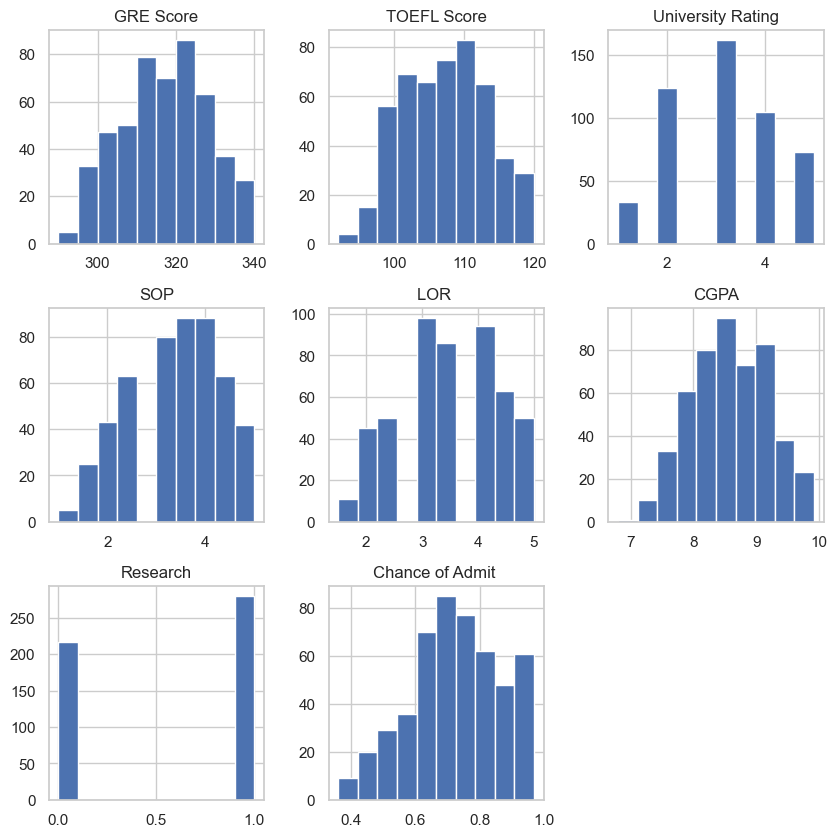

In [61]:
data.hist(figsize=(10, 10))
plt.show()

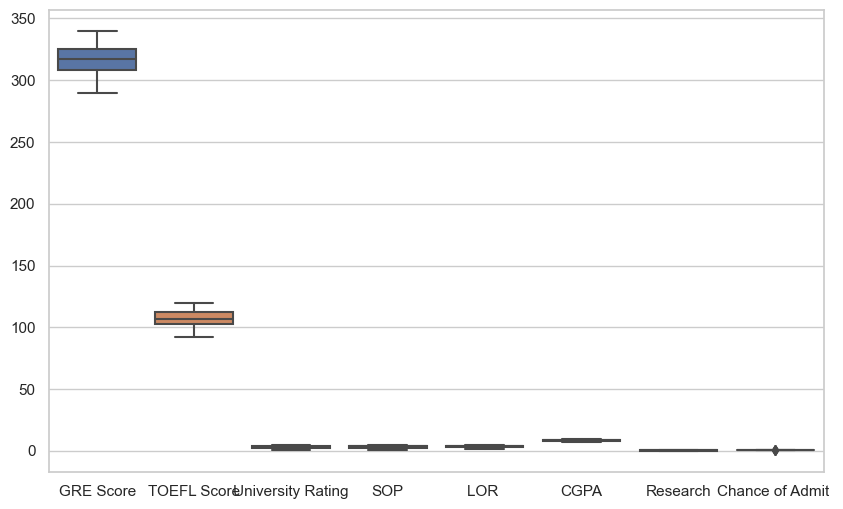

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.show()

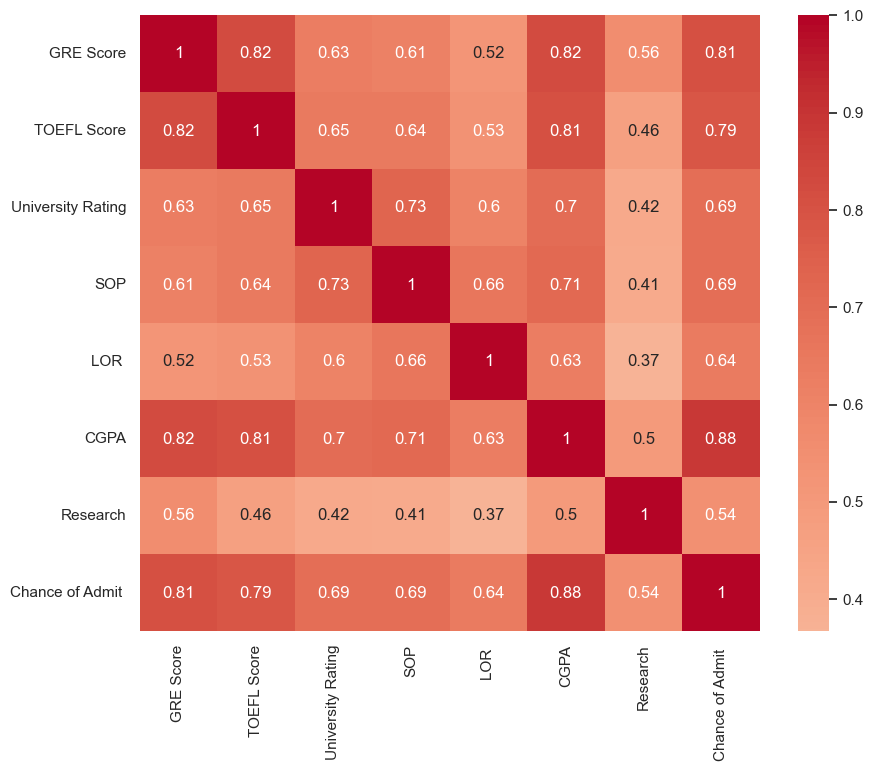

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()


# Example: One-way ANOVA test for University Rating


# Perform one-way ANOVA for University Ratings and Chance of Admit

In [ ]:
ratings = data['University Rating'].unique()

# Create empty lists to store subsets

In [ ]:
rating_subsets = []

# Split data into subsets based on University Ratings

In [71]:
for rating in ratings:
    subset = data[data['University Rating'] == rating]['Chance of Admit ']
    rating_subsets.append(subset)

# Perform one-way ANOVA

In [72]:
anova_results = f_oneway(*rating_subsets)

# Print ANOVA results


In [73]:
print("ANOVA F-statistic:", anova_results.statistic)
print("ANOVA p-value:", anova_results.pvalue)

ANOVA F-statistic: 100.1735664295196
ANOVA p-value: 1.9128194727105432e-132


In [75]:


# Add a constant to the features (required for statsmodels)
X = sm.add_constant(data.drop(columns=['Chance of Admit ']))

# Target variable
y = data['Chance of Admit ']

# Fit the linear regression model using statsmodels
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     323.3
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          6.00e-179
Time:                        22:06:00   Log-Likelihood:                 706.09
No. Observations:                 497   AIC:                            -1396.
Df Residuals:                     489   BIC:                            -1363.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2351      0.10

# 1. Exploratory Data Analysis
# Summary statistics

In [29]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Counting the null values

In [30]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Univariate Analysis


In [34]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

# Plotting continuous variables

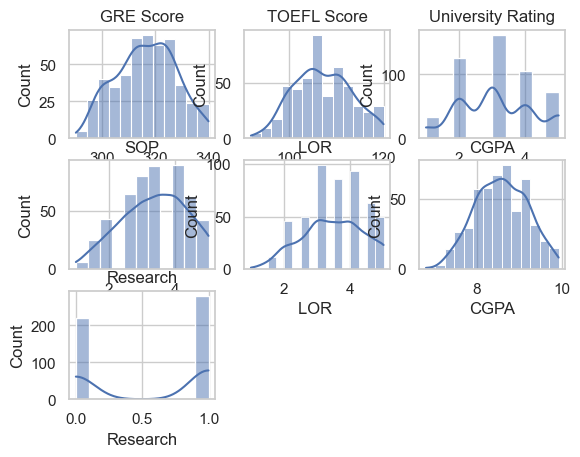

In [35]:
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(column)

# Bivariate Analysis

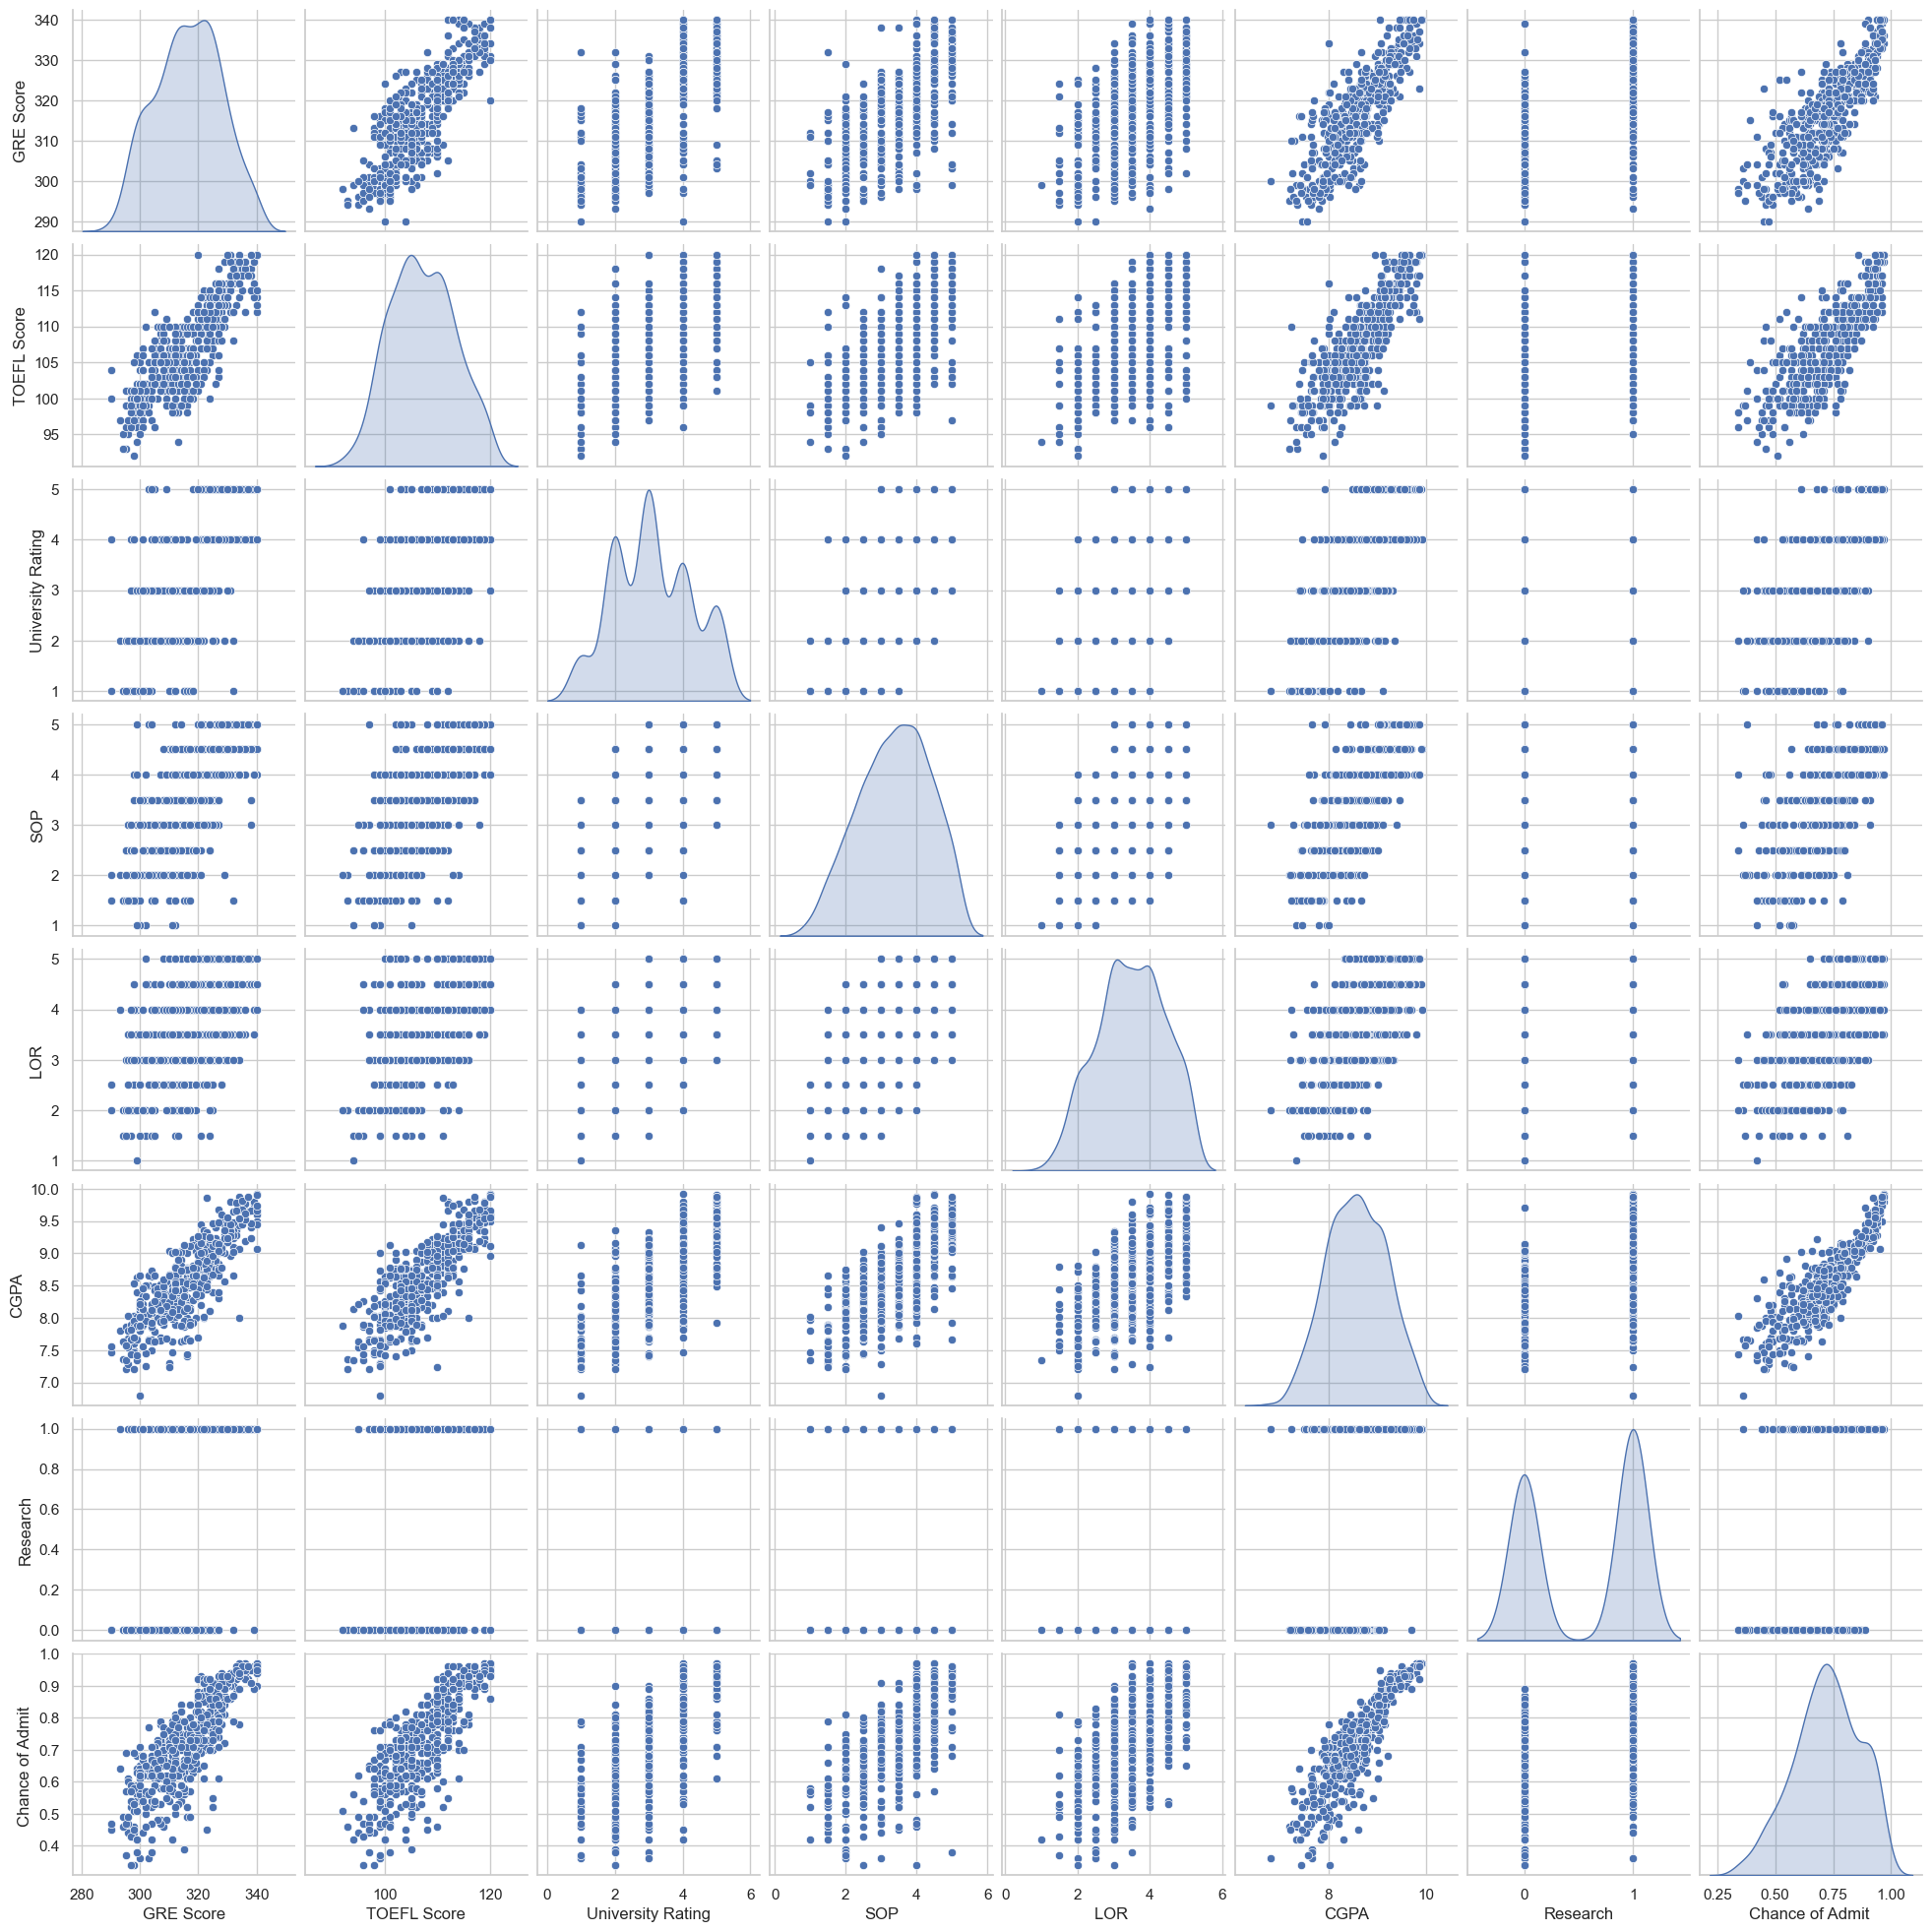

In [36]:
sns.pairplot(data, diag_kind='kde')
plt.show()


# 2. Data Preprocessing
# Check for duplicate values

In [37]:
data.duplicated().sum()

0

# Outlier treatment using IQR method

In [38]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Feature engineering (if any)

# 3. Model building
# Split the data into features and target variable


In [41]:
X = data.drop(columns=['Chance of Admit '])
y = data['Chance of Admit ']

# Split the data into training and testing sets



In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features


In [44]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression


In [46]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

# Ridge Regression


In [47]:
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=1)

# Lasso Regression


In [48]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

# Apply Elastic Net Regression

In [92]:
elasticnet_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # You can experiment with different alpha and l1_ratio values
elasticnet_model.fit(X_train, y_train)


ElasticNet(alpha=0.1)

# Predictions

In [93]:
elasticnet_predictions = elasticnet_model.predict(X_test)

In [94]:
# Evaluate the model
elasticnet_rmse = np.sqrt(mean_squared_error(y_test, elasticnet_predictions))
print("Elastic Net Regression RMSE:", elasticnet_rmse)

Elastic Net Regression RMSE: 0.08149135618183306


# 4. Testing the assumptions of the linear regression model
# Multicollinearity check by VIF score


In [49]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

             feature          VIF
0          GRE Score  1311.336379
1        TOEFL Score  1215.711563
2  University Rating    20.996452
3                SOP    35.560845
4               LOR     31.037767
5               CGPA   947.759449
6           Research     2.878970


# Residual analysis (for Linear Regression)



In [51]:
lr_residuals = y_test - lr.predict(X_test_scaled)

486    0.025318
73     0.040375
232    0.029835
176    0.014703
238    0.042109
         ...   
248    0.000544
386   -0.127114
19    -0.031158
322    0.046931
332    0.095662
Name: Chance of Admit , Length: 100, dtype: float64

# # 5. Model performance evaluation
# Metrics checked: MAE, RMSE, R2, Adjusted R2


In [89]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
    return mae, rmse, r2, adj_r2

lr_mae, lr_rmse, lr_r2, lr_adj_r2 = evaluate_model(lr, X_test_scaled, y_test)
ridge_mae, ridge_rmse, ridge_r2, ridge_adj_r2 = evaluate_model(ridge, X_test_scaled, y_test)
lasso_mae, lasso_rmse, lasso_r2, lasso_adj_r2 = evaluate_model(lasso, X_test_scaled, y_test)


In [57]:
print("Linear Regression Metrics:")
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)
print("R2 Score:", lr_r2)
print("Adjusted R2 Score:", lr_adj_r2)



Linear Regression Metrics:
MAE: 0.04364046935062818
RMSE: 0.06060791941835903
R2 Score: 0.7958581715074224
Adjusted R2 Score: 0.7803256410786393


In [56]:
print("\nRidge Regression Metrics:")
print("MAE:", ridge_mae)
print("RMSE:", ridge_rmse)
print("R2 Score:", ridge_r2)
print("Adjusted R2 Score:", ridge_adj_r2)




Ridge Regression Metrics:
MAE: 0.043677116865612514
RMSE: 0.060637521762486844
R2 Score: 0.7956587073942554
Adjusted R2 Score: 0.7801110003481662


In [55]:
print("\nLasso Regression Metrics:")
print("MAE:", lasso_mae)
print("RMSE:", lasso_rmse)
print("R2 Score:", lasso_r2)
print("Adjusted R2 Score:", lasso_adj_r2)


Lasso Regression Metrics:
MAE: 0.0919117239436524
RMSE: 0.11835304476444251
R2 Score: 0.22154749677035324
Adjusted R2 Score: 0.1623174150028801


In [81]:
# Calculate residuals
predictions = model.predict(X)
residuals = y - predictions

# Check the mean of residuals
mean_residuals = np.mean(residuals)
print("Mean of Residuals:", mean_residuals)

Mean of Residuals: -3.557181377088731e-15


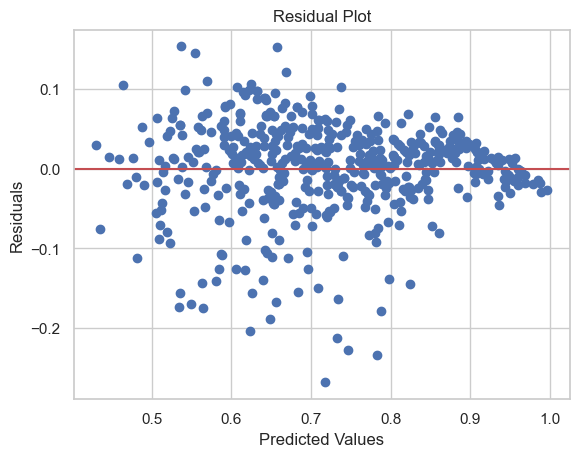

In [83]:
# Plot residuals vs. predicted values (residual plot)
plt.scatter(predictions, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.show()


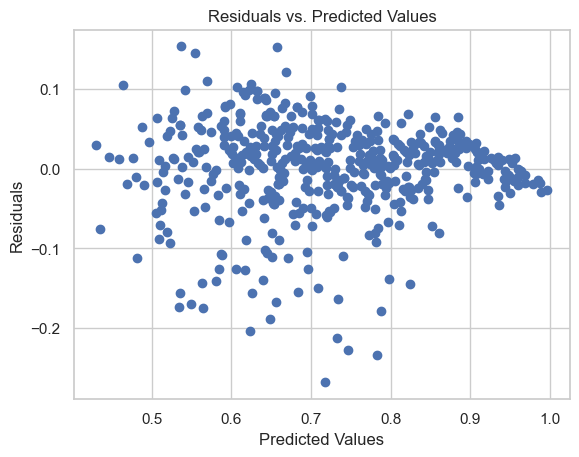

In [85]:
# Plot residuals vs. predicted values (to check for homoscedasticity)
plt.scatter(predictions, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


# Shapiro-Wilk test for normality of residuals


In [88]:
shapiro_test_stat, shapiro_p_value = shapiro(residuals)
print("Shapiro-Wilk Test Statistic:", shapiro_test_stat)
print("Shapiro-Wilk p-value:", shapiro_p_value)

Shapiro-Wilk Test Statistic: 0.9265875220298767
Shapiro-Wilk p-value: 7.181573925493269e-15


In [134]:


# Rename columns for convenience
data.columns = ['GRE Score', 'TOEFL Score', 'University Rating', 
                'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit','Total Score']

# Select independent variables for VIF calculation
independent_vars = ['GRE Score', 'TOEFL Score', 'University Rating',
                     'SOP', 'LOR', 'CGPA', 'Research','Chance of Admit','Total Score']

# Adding a constant to the independent variables matrix
X = add_constant(data[independent_vars])

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Iteratively drop variables with VIF>5
while vif_data['VIF'].max() > 5:
    max_vif_idx = vif_data['VIF'].idxmax()
    variable_to_drop = vif_data.loc[max_vif_idx, 'Variable']
    print(f"Dropping variable '{variable_to_drop}' with VIF: {vif_data['VIF'].max()}")
    vif_data = vif_data.drop(index=max_vif_idx)
    X = X.drop(columns=variable_to_drop)
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Final list of variables without multicollinearity
selected_vars = list(X.columns[1:])  # Exclude the constant term

# Print the selected variables
print("Variables without multicollinearity:", selected_vars)





Dropping variable 'GRE Score' with VIF: inf
Dropping variable 'const' with VIF: 1971.1368919570693
Dropping variable 'Total Score' with VIF: 2697.7284615998497
Dropping variable 'CGPA' with VIF: 837.2078231370276
Dropping variable 'Chance of Admit' with VIF: 88.61495320366957
Dropping variable 'SOP' with VIF: 33.27308669471864
Dropping variable 'LOR' with VIF: 25.700130288421633
Dropping variable 'University Rating' with VIF: 11.840109675862541
Variables without multicollinearity: ['Research']


C:\Users\criss\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Actionable Insights:
Emphasis on Academic Excellence:

Applicants with higher GRE scores, TOEFL scores, and strong undergraduate GPAs have a higher chance of admission. Emphasize the importance of academic excellence to prospective students.
Encourage Research Experience:

Research experience positively influences admission chances. Encourage students to engage in research projects, internships, or publish academic papers during their undergraduate studies.
Optimize Statement of Purpose and Recommendations:

Invest in workshops or guidance sessions to help applicants write compelling Statements of Purpose. Strong recommendation letters are valuable; provide guidance to students and recommenders to enhance their quality.
Diversity and Inclusion:

Promote diversity and inclusivity within the student body. Consider applicants from various backgrounds, as a diverse student community enriches the learning experience for everyone.
Recommendations:
Targeted Exam Preparation Programs:

Develop targeted exam preparation programs for GRE and TOEFL. Provide resources, practice exams, and workshops to help students improve their scores.
Feedback Mechanism for Rejected Applicants:

Establish a feedback system for rejected applicants. Providing constructive feedback can guide them on areas needing improvement, encouraging reapplication with strengthened profiles.
Alumni Mentorship Program:

Launch an alumni mentorship program where successful graduates mentor prospective applicants. Alumni can share their experiences and provide valuable insights into the application process.
Holistic Application Review:

Implement a holistic application review process, considering not only academic achievements but also extracurricular activities, leadership qualities, and unique experiences. A well-rounded applicant should be valued.
Community Outreach and Partnerships:

Collaborate with schools, community organizations, and educational partners. Conduct outreach programs to identify talented individuals who might lack resources or information about higher education opportunities.
Continuous Data Analysis and Adaptation:

Continuously analyze admission data, identifying trends and successful application profiles. Use this data-driven approach to adapt admission strategies and criteria for better outcomes.
Transparency in Admissions Criteria:

Maintain transparency in admissions criteria. Clearly communicate the weightage of each criterion, empowering applicants to focus on areas that matter the most.
Support Services for Applicants:

Offer support services such as essay writing workshops, interview preparation, and application counseling. Well-prepared applicants are more likely to present compelling applications.
By implementing these strategies, the institution can foster a competitive and diverse student body while ensuring fairness and transparency in the admissions process. Continuous evaluation and refinement of these initiatives based on their effectiveness will contribute to long-term success in attracting and admitting high-potential candidates.